In [27]:
import pandas as pd


In [28]:
file_path = r"D:\clg s6\Amazon_Reviews.csv"

In [29]:
import pandas as pd
df = pd.read_csv(file_path)

In [30]:
df.head()

,Name,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
0,Software Development Engineer,Hyderabad/Secunderabad,Full Time,Software Development Department,8 Aug 2023,2,1,2,5,1,3,3,The office is great and you have best in indus...,Worst work life balance.\nThe managers have to...
1,Dls Case Specialist II HR Assistant,Hyderabad/Secunderabad,Full Time,HR Operations Department,8 Aug 2023,1,5,1,3,1,2,1,Good work life balance and team building exerc...,No job security. They will cut you out any-day...
2,Customer Support Associate (working remotely),NaN,Full Time,Customer Success Department,8 Aug 2023,1,2,1,2,1,2,3,"good about this company, provides virtual roles","this company is really bad , no job security ,..."
3,Sds Associate (working remotely),NaN,Full Time,Non Voice Department,7 Aug 2023,2,3,2,2,2,2,2,Leaves are there but more than policy it will ...,To be honest there are Many consumer team but ...
4,Software Developer,"Bengaluru/Bangalore, Karnataka",Full Time,Software Development Department,7 Aug 2023,4,3,4,5,3,4,3,Amazon has high standard when it comes to runn...,Management layer has lot of redundancies.


In [31]:
cleaned_data = df.drop(columns=['Name', 'Place'])


In [32]:
print(cleaned_data.head())

    Job_type                       Department        Date  Overall_rating  \
0  Full Time  Software Development Department  8 Aug 2023               2   
1  Full Time         HR Operations Department  8 Aug 2023               1   
2  Full Time      Customer Success Department  8 Aug 2023               1   
3  Full Time             Non Voice Department  7 Aug 2023               2   
4  Full Time  Software Development Department  7 Aug 2023               4   

   work_life_balance  skill_development  salary_and_benefits  job_security  \
0                  1                  2                    5             1   
1                  5                  1                    3             1   
2                  2                  1                    2             1   
3                  3                  2                    2             2   
4                  3                  4                    5             3   

   career_growth  work_satisfaction  \
0              3             

In [33]:
print(df.isnull().sum())

Name                      0
Place                  1998
Job_type                  0
Department                0
Date                      0
Overall_rating            0
work_life_balance         0
skill_development         0
salary_and_benefits       0
job_security              0
career_growth             0
work_satisfaction         0
Likes                     0
Dislikes                  0
dtype: int64


In [34]:
df = df.dropna()
print(df.isnull().sum())

Name                   0
Place                  0
Job_type               0
Department             0
Date                   0
Overall_rating         0
work_life_balance      0
skill_development      0
salary_and_benefits    0
job_security           0
career_growth          0
work_satisfaction      0
Likes                  0
Dislikes               0
dtype: int64


In [35]:
df['Overall_rating'] = df['Overall_rating'].fillna(df['Overall_rating'].mean())
df['Department'] = df['Department'].fillna(df['Department'].mode()[0])
df['Likes'] = df['Likes'].fillna('Not Applicable')

In [36]:
df['Likes'] = df['Likes'].str.lower()
df['Dislikes'] = df['Dislikes'].str.lower()

In [37]:
import re

def remove_extra_spaces(text):
  return re.sub(r'\s+', ' ', text)

df['Likes'] = df['Likes'].apply(remove_extra_spaces)
df['Dislikes'] = df['Dislikes'].apply(remove_extra_spaces)

In [38]:
!pip install nltk
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

df['Likes_tokens'] = df['Likes'].apply(word_tokenize)
df['Dislikes_tokens'] = df['Dislikes'].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oswal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatization(tokens):
  return [lemmatizer.lemmatize(word) for word in tokens]

df['Likes_tokens'] = df['Likes_tokens'].apply(lemmatization)
df['Dislikes_tokens'] = df['Dislikes_tokens'].apply(lemmatization)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oswal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)

# Flatten the list of lists using list comprehension
Likes_tokens_flat = [item for sublist in df['Likes_tokens'] for item in sublist]

# Create BoW representation for flattened likes tokens
Likes_features = vectorizer.fit_transform(Likes_tokens_flat)

# Repeat for Dislikes (if applicable)
Dislikes_tokens_flat = [item for sublist in df['Dislikes_tokens'] for item in sublist]
Dislikes_features = vectorizer.fit_transform(Dislikes_tokens_flat)


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)  # Restrict vocabulary size (optional)

# Create TF-IDF representation for Likes and Dislikes
Likes_features = vectorizer.fit_transform(Likes_tokens_flat)
Dislikes_features = vectorizer.fit_transform(Dislikes_tokens_flat)


In [42]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Encode department (example)
df['Department_encoded'] = encoder.fit_transform(df['Department'])


In [43]:
!python -m nltk.downloader vader_lexicon

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def lexicon_sentiment(tokens):
  sentiment_score = 0
  for token in tokens:
    # Look up word sentiment score in lexicon (replace with your chosen lexicon)
    sentiment_score += analyzer.polarity_scores(token)['compound']
  return sentiment_score

# Calculate sentiment scores for Likes and Dislikes
df['Likes_sentiment'] = df['Likes_tokens'].apply(lexicon_sentiment)
df['Dislikes_sentiment'] = df['Dislikes_tokens'].apply(lexicon_sentiment)

# Standardize the sentiment scores using linear transformation
min_score = min(df['Likes_sentiment'].min(), df['Dislikes_sentiment'].min())
max_score = max(df['Likes_sentiment'].max(), df['Dislikes_sentiment'].max())

df['Likes_sentiment_standardized'] = (2 * (df['Likes_sentiment'] - min_score) / (max_score - min_score)) - 1
df['Dislikes_sentiment_standardized'] = (2 * (df['Dislikes_sentiment'] - min_score) / (max_score - min_score)) - 1

# Print a success message
print("Sentiment scores standardized to the range [-1, 1].")


<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\oswal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment scores standardized to the range [-1, 1].


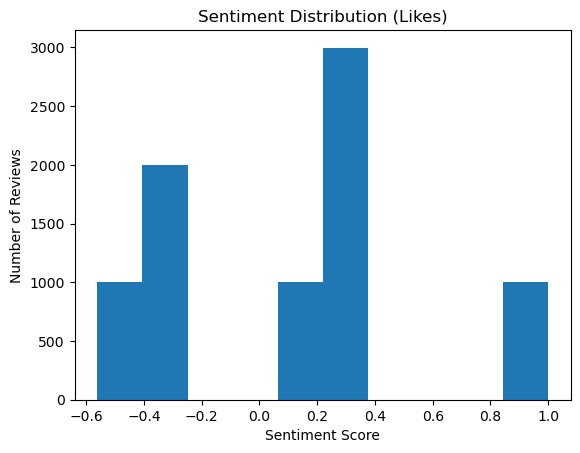

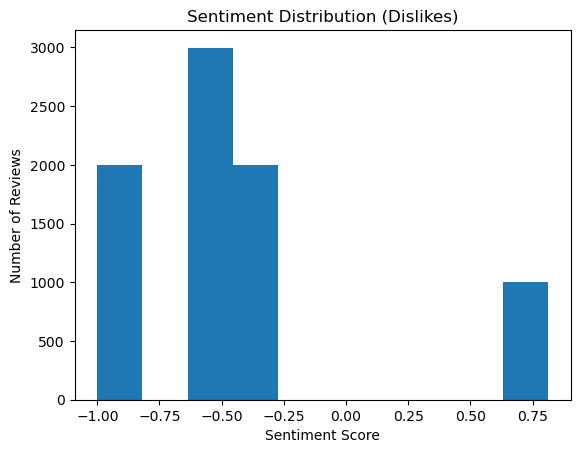

In [45]:
import matplotlib.pyplot as plt

# Sentiment distribution for Likes
plt.hist(df['Likes_sentiment_standardized'])
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution (Likes)')
plt.show()
# Repeat for Dislikes sentiment distribution
plt.hist(df['Dislikes_sentiment_standardized'])
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution (Dislikes)')
plt.show()

In [46]:
print(cleaned_data.tail())

       Job_type                               Department        Date  \
9985  Full Time                    Operations Department  6 Aug 2023   
9986  Full Time  Occupational Health & Safety Department  6 Aug 2023   
9987  Full Time              Customer Success Department  4 Aug 2023   
9988  Full Time               Voice / Blended Department  4 Aug 2023   
9989  Full Time                        Policy Department  3 Aug 2023   

      Overall_rating  work_life_balance  skill_development  \
9985               3                  2                  1   
9986               2                  2                  3   
9987               1                  2                  1   
9988               5                  4                  5   
9989               3                  2                  3   

      salary_and_benefits  job_security  career_growth  work_satisfaction  \
9985                    4             4              4                  1   
9986                    3             2 

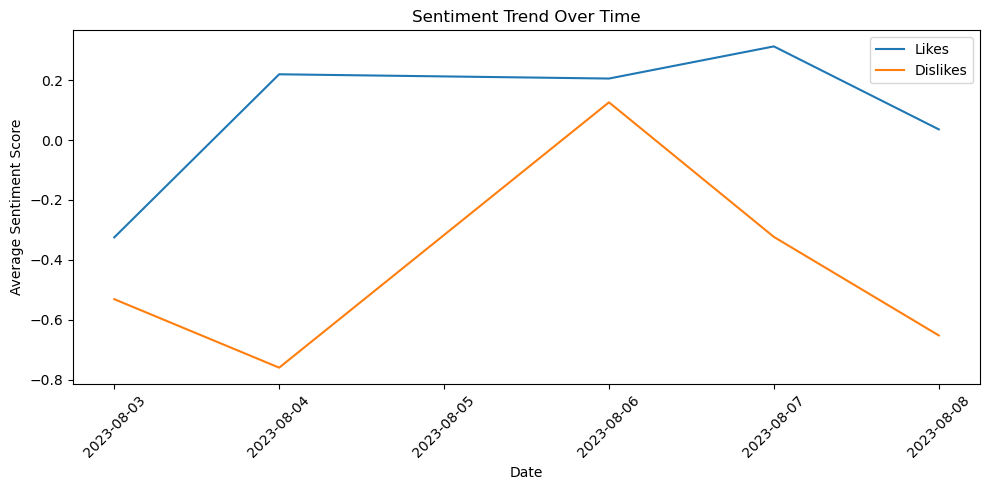

In [47]:
df['Date'] = pd.to_datetime(df['Date'], format='%d %b %Y')

day_by_day_sentiment_likes = df.groupby(df['Date'].dt.to_period('d'))['Likes_sentiment_standardized'].mean()
day_by_day_sentiment_dislikes = df.groupby(df['Date'].dt.to_period('d'))['Dislikes_sentiment_standardized'].mean()

# Plot sentiment trend over time
plt.figure(figsize=(10, 5))
plt.plot(day_by_day_sentiment_likes.index.to_timestamp(), day_by_day_sentiment_likes, label='Likes')
plt.plot(day_by_day_sentiment_dislikes.index.to_timestamp(), day_by_day_sentiment_dislikes, label='Dislikes')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Trend Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()

In [48]:
correlation = df['Likes_sentiment_standardized'].corr(df['Overall_rating'])
print(f"Correlation between Likes sentiment and Overall Rating: {correlation}")

Correlation between Likes sentiment and Overall Rating: 0.7951050256474271


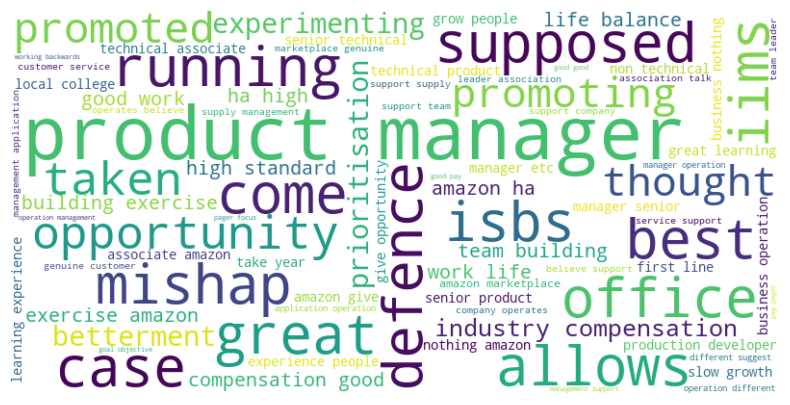

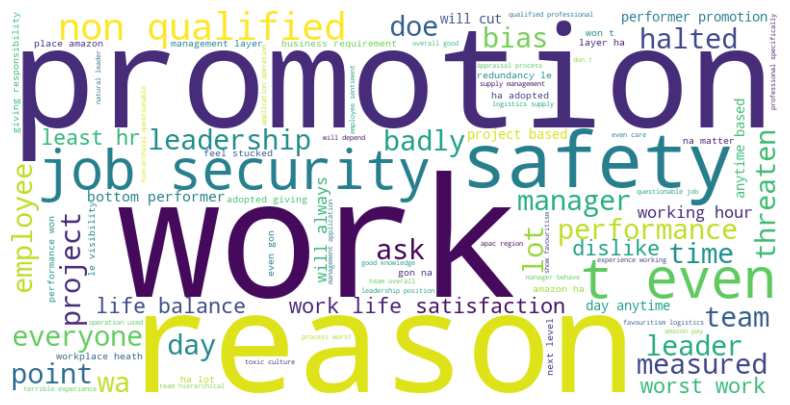

In [49]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Word Cloud
def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud for Likes and Dislikes separately
generate_word_cloud(' '.join(Likes_tokens_flat))
generate_word_cloud(' '.join(Dislikes_tokens_flat))
